# Visualization of gridded data

## Introduction

This notebook refers to different ways of plotting gridded data, a task that we face very often. Let's have a look on some examples.

**Table of Contents:**

* [imshow](#imshow)
* [pcolormesh](#pcolormesh)
* [Using Basemap](#Using-Basemap)

## `imshow` 

imshow displays data as an image, i.e., on a 2D regular raster

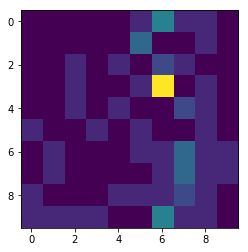

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

data = [ [0,0,0,0,0,1,4,1,1,0],
         [0,0,0,0,0,3,0,0,1,0],
         [0,0,1,0,1,0,2,1,0,0],
         [0,0,1,0,0,1,9,0,1,0],
         [0,0,1,0,1,0,0,2,1,0],
         [1,0,0,1,0,1,0,0,1,0],
         [0,1,0,0,0,1,1,3,1,1],
         [0,1,0,0,0,0,1,3,1,1],
         [1,0,0,0,1,1,1,2,1,0],
         [1,1,1,1,0,0,4,1,1,0] ]
plt.imshow(data)
plt.show()

## `pcolormesh`
*pcolormesh* creates a pseudocolor plot with a non-regular rectangular grid.

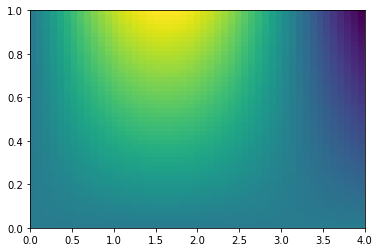

In [27]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,4)
y = np.linspace(0,1)

def f(x, y):
    return y * np.sin(x) 

X, Y = np.meshgrid(x,y)
Z = np.zeros((50,50))

for i in range(50):
   for j in range(50):
       Z[i,j] = f(X[i,j],Y[i,j])

plt.pcolormesh(X, Y, Z)
plt.show()

# Using Basemap

Here we will use the interpolation subpackage contained in SciPy (package described in Module 3.2). The following example shows how to create a map using Basemap and include in it the slip data of the 2010 Maule earthquake in Chile. The data contain 3 columns (longitude, latitude and slip) and we want to interpolate these points to a regular grid.

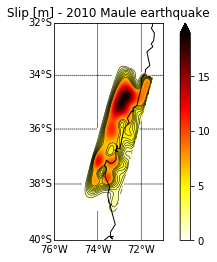

In [7]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

data = np.loadtxt(fname='data/slip_maule.xyz')
slip = data[:,2]
lat = data[:,1]
lon = data[:,0]

#Let's define the map extension by giving some coordinates
lat1=-40; lat2=-32; lon1=-76; lon2=-71

#Now we use Basemap for the map creation
m=Basemap(projection='merc', llcrnrlon=lon1, llcrnrlat=lat1, urcrnrlon=lon2,urcrnrlat=lat2, resolution='l')
m.drawcoastlines(zorder=16)
m.drawmeridians(np.arange(0,360,2),labels=[0,0,0,1])
m.drawparallels(np.arange(-90,90,2),labels=[1,0,0,0])

lonm, latm = m(lon, lat) #We take the coordinates as part of the map 
numcols, numrows = 100, 100
xi = np.linspace(lonm.min(), lonm.max(), numcols)
yi = np.linspace(latm.min(), latm.max(), numrows)
xi, yi = np.meshgrid(xi, yi) #
zi=griddata((lonm,latm),slip,(xi,yi),method ='linear')

blevels_top=np.linspace(slip.min(),slip.max(),100)
im=plt.contourf(xi,yi,zi,levels=blevels_top,cmap=plt.cm.hot_r,extend='max',zorder=15)
level=np.linspace(0,6,10)
cs =plt.contour(xi, yi, zi, levels=level, linewidths=0.5, colors='k',
                linestyles = '-', zorder=15)
ticks=np.linspace(0,40,9)
plt.colorbar(im,ticks=ticks)
                
plt.title('Slip [m] - 2010 Maule earthquake')
plt.show()   


To check other tools, you can visit [Pyrocko-gridded data](https://pyrocko.org/docs/current/library/examples/plotting.html#map-with-gridded-data) to see another example on how to plot a map with gridded data included using GMT methods.

## Summary

* You know how to use **imshow** and **pcolormesh** to plot gridded data.
* You know how to interpolate gridded data and plot it using **Basemap**.